<a href="https://colab.research.google.com/github/davione112/Collection_Preprocessing/blob/master/BikeSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset


In [75]:
import pandas as pd
import requests

In [76]:
url = 'https://raw.githubusercontent.com/davione112/work/master/train.csv'
dataset = pd.read_csv(url)

In [77]:
dataset.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# Preprocessing

In [78]:
from datetime import datetime

Change datatype of 'datetime' column to datetime.
Get hour in 'datetime' column.

---



In [79]:
dt_col = dataset['datetime']
print(dt_col)
hours = []
for i in range(0,len(dt_col)):
 x = datetime.strptime(dt_col[i], "%Y-%m-%d %H:%M:%S")
 hours.append(x.hour)

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object


In [80]:
new_dataset = dataset.iloc[:,1:12]
new_dataset['hours'] = hours
new_dataset.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9


Create a correlation matrix.

In [81]:
from seaborn import heatmap
import matplotlib.pyplot as plt

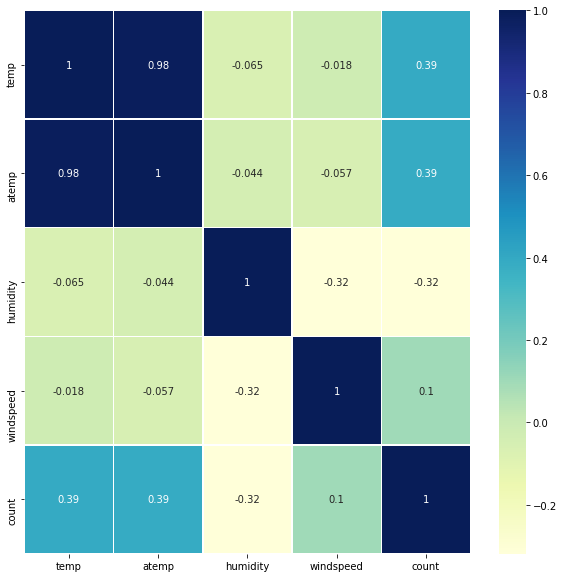

In [82]:
continuous_data = new_dataset[['temp','atemp','humidity','windspeed','count']]
matrix_corr = continuous_data.corr()
plt.figure(figsize=(10,10))
heatmap(matrix_corr, cmap='YlGnBu', annot=True, annot_kws={"size":10}, linewidths=0.5)
plt.show()

In [83]:
new_dataset = new_dataset[['hours','holiday','workingday','season','weather','temp','atemp',
                           'humidity','windspeed','count']]
new_dataset.head()

,hours,holiday,workingday,season,weather,temp,atemp,humidity,windspeed,count
0,0,0,0,1,1,9.84,14.395,81,0.0,16
1,1,0,0,1,1,9.02,13.635,80,0.0,40
2,2,0,0,1,1,9.02,13.635,80,0.0,32
3,3,0,0,1,1,9.84,14.395,75,0.0,13
4,4,0,0,1,1,9.84,14.395,75,0.0,1


Make a summaries of variables.

In [59]:
print(new_dataset['temp'].describe())
print(new_dataset['atemp'].describe())
print(new_dataset['humidity'].describe())
print(new_dataset['windspeed'].describe())

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64
count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64
count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64
count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64


In [67]:
pd.crosstab(index=new_dataset['season'],columns=new_dataset['weather'],margins=True)

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


In [ ]:
X = new_dataset.iloc[:,0:7]
print(X.head())
Y = new_dataset.iloc[:,-1]
print(Y.head())

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size = 0.7, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7620, 7)
(3266, 7)
(7620,)
(3266,)


# Train model